In [1]:
# Connect to my google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


orange


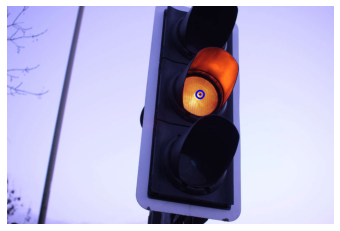

In [9]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

def detect_traffic_light_color(imgPath):
    img = cv2.imread(imgPath)
    output = img.copy()
    # convert to hsv
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Green mask
    lower_green = np.array([40,50,50])
    upper_green = np.array([90,255,255])

    mask_green = cv2.inRange(hsv, lower_green, upper_green)
    mask_green= cv2.medianBlur(mask_green,19)

    # red mask
    lower_red = np.array([160,100,100])
    upper_red = np.array([180,255,255])

    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    mask_red = cv2.medianBlur(mask_red,19)
    # yellow mask
    lower_yellow = np.array([15,150,150])
    upper_yellow = np.array([35,255,255])
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_yellow = cv2.medianBlur(mask_yellow,19)

    # hough circle detect
    r_circles = cv2.HoughCircles(mask_red, cv2.HOUGH_GRADIENT, 1, 60,
                                param1=50, param2=10, minRadius=10, maxRadius=20)

    g_circles = cv2.HoughCircles(mask_green, cv2.HOUGH_GRADIENT, 1, 60,
                                param1=50, param2=7, minRadius=10, maxRadius=20)

    y_circles = cv2.HoughCircles(mask_yellow, cv2.HOUGH_GRADIENT, 1, 60,
                                param1=50, param2=5, minRadius=10, maxRadius=20)
    


    if r_circles is not None:
        r_circles = np.uint16(np.around(r_circles))
        for (x, y ,r) in r_circles[0, :]:
            cv2.circle(output, (x, y), r, (255, 0, 0), 3)
            cv2.circle(output, (x, y), 2, (255, 0, 0), 3)
            plt.imshow(output)
            print("red")

    if g_circles is not None:
        g_circles = np.uint16(np.around(g_circles))
        for (x, y ,r) in g_circles[0, :]:
            cv2.circle(output, (x, y), r, (255, 0, 0), 3)
            cv2.circle(output, (x, y), 2, (255, 0, 0), 3)
            output=cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
            plt.imshow(output)
            print("green")

    if y_circles is not None:
        y_circles = np.uint16(np.around(y_circles))
        for (x, y ,r) in y_circles[0, :]:
            cv2.circle(output, (x, y), r, (255, 0, 0), 3)
            cv2.circle(output, (x, y), 2, (255, 0, 0), 3)
            output=cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
            
            plt.imshow(output)
            print("orange")

plt.axis("off")
detect_traffic_light_color("/content/gdrive/MyDrive/tests/yellow-traffic-light.jpg")
